# Unemployment Claims in the United States

Review the unemployment claims in the United State in 2019 and 2020.

Original data from https://oui.doleta.gov/unemploy/claims.asp

## Import Dependencies

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import math
import numpy as np
import warnings

print('pandas version:  ',pd. __version__)
print('seaborn version: ',sns. __version__)
print('numpy version:   ',np. __version__)

pandas version:   1.2.4
seaborn version:  0.11.1
numpy version:    1.20.1


## Grab Data

Read the csv file and store it. Display the first 5 rows as a preview.

In [2]:
unemployment_data = pd.read_csv(r'./data/State_by_Year.csv')

# Check the first few rows
unemployment_data.head()

,State,Year,Claims,Claims_in_millions,Unnamed: 4
0,California,2020,11537768,11.5,NaN
1,New York,2020,4708666,4.7,NaN
2,Florida,2020,4310784,4.3,NaN
3,Georgia,2020,4286913,4.3,NaN
4,Texas,2020,4210238,4.2,NaN


## Summarize the Numeric Columns

We can use `describe()` to summarize the numeric columns.

This will include the **Year** column, however, only the **Claims** column makes sense here.

In [3]:
# Summarize the numeric columns
print('Total Row Count =', len(unemployment_data))
unemployment_data.describe()

Total Row Count = 106


,Year,Claims,Claims_in_millions,Unnamed: 4
count,106.000000,1.060000e+02,106.000000,0.0
mean,2019.500000,7.702800e+05,0.771698,NaN
std,0.502375,1.432701e+06,1.431134,NaN
min,2019.000000,1.532000e+03,0.000000,NaN
25%,2019.000000,1.010010e+05,0.100000,NaN
50%,2019.500000,2.830210e+05,0.300000,NaN
75%,2020.000000,8.377425e+05,0.800000,NaN
max,2020.000000,1.153777e+07,11.500000,NaN


## Confirm Years in Data

Confirm that our data set only contains data for **2019** and **2020**.

In [4]:
# Confirm the number of years in the data.

data_years = unemployment_data['Year'].unique()
print('Years: ', data_years)

expected_number_of_years = 2
print('Number of years is 2? ',len(data_years) == 2)

Years:  [2020 2019]
Number of years is 2?  True


## Summarize Claims Column

In [5]:
# Define the column that we'll be plotting
desired_column = 'Claims_in_millions'

# Summarize the Claims column
unemployment_data[desired_column].describe()

count    106.000000
mean       0.771698
std        1.431134
min        0.000000
25%        0.100000
50%        0.300000
75%        0.800000
max       11.500000
Name: Claims_in_millions, dtype: float64

## Exclude Outliers

Looking at the Claims data, we can assume some outliers beyond the lower 25% and upper 75%.

* 25% --> 0.1
* 75% --> 0.8

Let's round to get some cutoffs:

* Minimum --> 0
* Maximum --> 1

We'll also create two new data sets.

* 2019 --> `unemployment_2019`
* 2020 --> `unemployment_2020`

In [6]:
# Exclude outliers
cutoff_min = 0
cutoff_max = 1
unemployment_data_limited = unemployment_data[unemployment_data[desired_column].between(cutoff_min, cutoff_max)]

# Check the first few rows
unemployment_data_limited.head()

,State,Year,Claims,Claims_in_millions,Unnamed: 4
22,Missouri,2020,1014897,1.0,NaN
23,Tennessee,2020,981814,1.0,NaN
24,Oklahoma,2020,972453,1.0,NaN
25,Alabama,2020,917838,0.9,NaN
26,South Carolina,2020,842348,0.8,NaN


In [7]:
# Create a collection of claims for each year (2019)
unemployment_2019 = unemployment_data_limited[(unemployment_data_limited.Year == 2019)]

# Check the first few rows of each (2019)
unemployment_2019.head()

,State,Year,Claims,Claims_in_millions,Unnamed: 4
27,New York,2019,823926,0.8,NaN
31,Pennsylvania,2019,739399,0.7,NaN
32,Texas,2019,701860,0.7,NaN
37,New Jersey,2019,492540,0.5,NaN
38,Illinois,2019,489831,0.5,NaN


In [8]:
# Create a collection of claims for each year (2020)
unemployment_2020 = unemployment_data_limited[(unemployment_data_limited.Year == 2020)]

# Check the first few rows of each (2020)
unemployment_2020.head()

,State,Year,Claims,Claims_in_millions,Unnamed: 4
22,Missouri,2020,1014897,1.0,NaN
23,Tennessee,2020,981814,1.0,NaN
24,Oklahoma,2020,972453,1.0,NaN
25,Alabama,2020,917838,0.9,NaN
26,South Carolina,2020,842348,0.8,NaN


## Create Boxplots

Create a boxplot with our new datasets, `unemployment_2019` and `unemployment_2020`.

Text(0, 0.5, 'Claims')

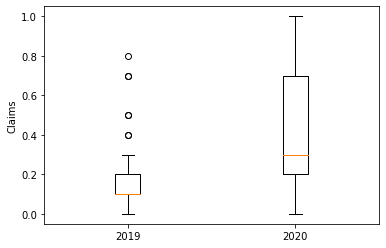

In [9]:
# Create a box plot for each year.
plt.boxplot([unemployment_2019[desired_column], unemployment_2020[desired_column]], labels=['2019', '2020'])
plt.ylabel('Claims')

Text(0, 0.5, 'Claims')

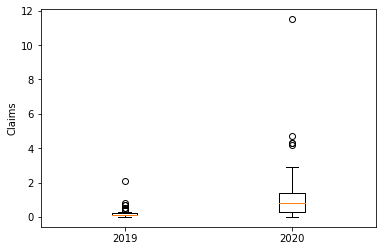

In [10]:
# Create a collection of claims for each year (2020)
unemployment_2020_full = unemployment_data[(unemployment_data.Year == 2020)]

# Create a collection of claims for each year (2020)
unemployment_2019_full = unemployment_data[(unemployment_data.Year == 2019)]

# Create a box plot for each year.
plt.boxplot([unemployment_2019_full[desired_column], unemployment_2020_full[desired_column]], labels=['2019', '2020'])
plt.ylabel('Claims')

## Create Histogram for 2019

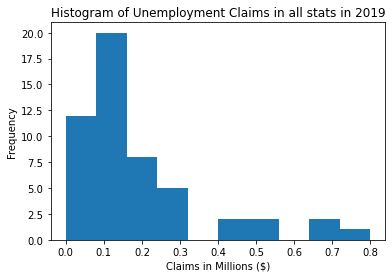

In [11]:
# bin_size = 5
# maximum = max(unemployment_2019[desired_column])
# minimum = min(unemployment_2019[desired_column])
# bins = math.ceil((maximum - minimum) / bin_size)

plt.hist(unemployment_2019[desired_column])
plt.xlabel('Claims in Millions ($)')
plt.ylabel('Frequency')
plt.title('Histogram of Unemployment Claims in all stats in 2019');
plt.show() 

## Create Histogram for 2020

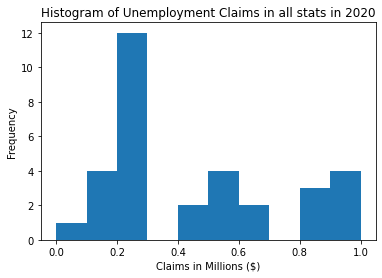

In [12]:
# bin_size = 5
# maximum = max(unemployment_2020[desired_column])
# minimum = min(unemployment_2020[desired_column])
# bins = math.ceil((maximum - minimum) / bin_size)

plt.hist(unemployment_2020[desired_column])
plt.xlabel('Claims in Millions ($)')
plt.ylabel('Frequency')
plt.title('Histogram of Unemployment Claims in all stats in 2020');
plt.show() 

## Side-by-Side (Limited Set)

Text(0.5, 1.05, 'COVID Impact on Unemployment Claims (Removed Outliers)')

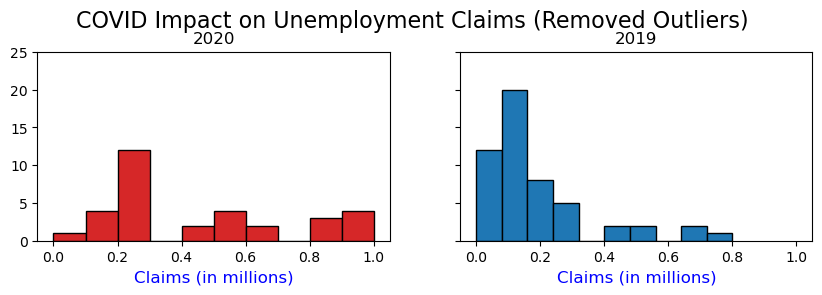

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:blue']

for i, (ax, Year) in enumerate(zip(axes.flatten(), unemployment_data_limited.Year.unique())):
    x = unemployment_data_limited.loc[unemployment_data_limited.Year==Year, 'Claims_in_millions']
    ax.hist(x, bins=10, label=str(Year), color=colors[i], edgecolor = 'black')
    ax.set_title(Year)
    ax.set_xlabel('Claims (in millions)', fontsize = 12, color = 'b')
    
plt.ylim(0, 25)

plt.suptitle('COVID Impact on Unemployment Claims (Removed Outliers)', y=1.05, size=16)
#plt.tight_layout();

## Side-by-Side (Original Set)

Text(0.5, 1.05, 'COVID Impact on Unemployment Claims (Full Set)')

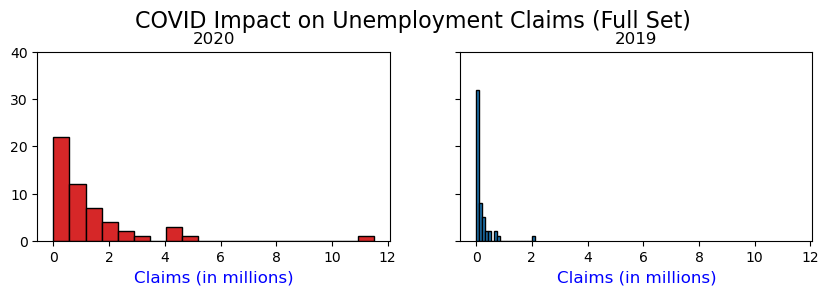

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:blue']

for i, (ax, Year) in enumerate(zip(axes.flatten(), unemployment_data.Year.unique())):
    x = unemployment_data.loc[unemployment_data.Year==Year, 'Claims_in_millions']
    ax.hist(x, bins=20, label=str(Year), color=colors[i], edgecolor = 'black')
    ax.set_title(Year)
    ax.set_xlabel('Claims (in millions)', fontsize = 12, color = 'b')
    
plt.ylim(0, 40)

plt.suptitle('COVID Impact on Unemployment Claims (Full Set)', y=1.05, size=16)

# Re-Employment Data

## Side-by-Side

Text(0.5, 1.05, 'COVID Impact on Re-Employment')

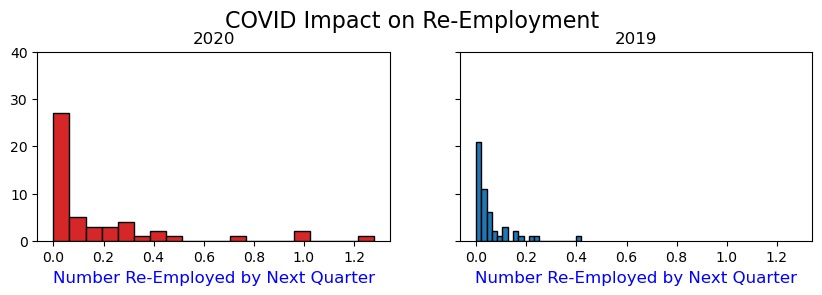

In [15]:
df = pd.read_csv(r'./data/reemployment data/Combined Short-Table 1.csv')

fig, axes = plt.subplots(1, 2, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:blue']

desired_column='# Remployed by next Quarter (millions)'
# desired_column='# Received UI Payment'

for i, (ax, Year) in enumerate(zip(axes.flatten(), df.Year.unique())):
    x = df.loc[df.Year==Year, desired_column]
    ax.hist(x, bins=20, label=str(Year), color=colors[i], edgecolor = 'black')
    ax.set_title(Year)
    ax.set_xlabel('Number Re-Employed by Next Quarter', fontsize = 12, color = 'b')
    
plt.ylim(0, 40)

plt.suptitle('COVID Impact on Re-Employment', y=1.05, size=16)

# Ed Anderson's Python

## Descriptive Statistics

In [16]:
df = pd.read_csv(r'./data/Years_Cleaned.csv')

display(df[["2019_Claims","2020_Claims"]].describe())

,2019_Claims,2020_Claims
count,53.000000,53.000000
mean,0.211321,1.332075
std,0.323835,1.841381
min,0.000000,0.000000
25%,0.100000,0.300000
50%,0.100000,0.800000
75%,0.200000,1.400000
max,2.100000,11.500000


## Histogram Side-by-Side

Text(0.5, 1.05, 'COVID Impact on Unemployment Claims')

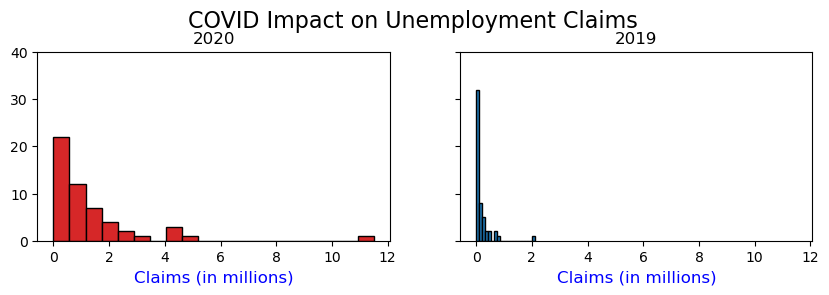

In [17]:
# import pandas as pd
# from matplotlib import pyplot as plt

df = pd.read_csv(r'./data/State_by_Year.csv')

fig, axes = plt.subplots(1, 2, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:blue']

for i, (ax, Year) in enumerate(zip(axes.flatten(), df.Year.unique())):
    x = df.loc[df.Year==Year, 'Claims_in_millions']
    ax.hist(x, bins=20, label=str(Year), color=colors[i], edgecolor = 'black')
    ax.set_title(Year)
    ax.set_xlabel('Claims (in millions)', fontsize = 12, color = 'b')
    
plt.ylim(0, 40)

plt.suptitle('COVID Impact on Unemployment Claims', y=1.05, size=16)
#plt.tight_layout();

## Monthly Line Chart

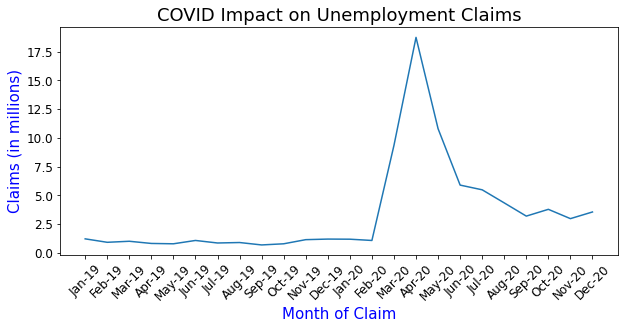

In [18]:
# import matplotlib.pyplot as plt
# import pandas as pd

df = pd.read_csv(r'./data/Claims_by_Month.csv')

plt.figure(figsize=(10, 4.2))
x = range(len(df['Claims']))
plt.plot(x, df['Claims'])
plt.xticks(x, df['Month'])
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.title('COVID Impact on Unemployment Claims', fontsize = 18)
plt.ylabel('Claims (in millions)', fontsize = 15, color = 'b')
plt.xlabel('Month of Claim', fontsize = 15, color = 'b')

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

## Unemployment Claims

### Unemployment Claims 2019

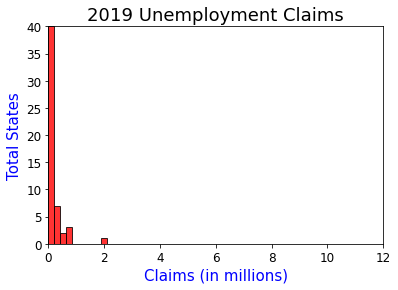

In [19]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv (r'./data/Years_Cleaned.csv')

data = df['2019_Claims']
bins=10

plt.hist(df['2019_Claims'], bins, color = 'red', alpha = 0.8, edgecolor = 'black')

plt.title('2019 Unemployment Claims', fontsize = 18)
plt.xlabel('Claims (in millions)', fontsize = 15, color = 'b')
plt.xlim(0, 12)
plt.ylim(0, 40)
plt.ylabel('Total States', fontsize = 15, color = 'b')

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

### Unemployment Claims 2020

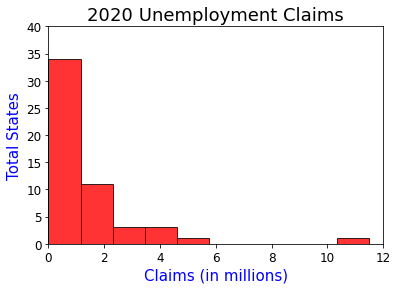

In [20]:
# import pandas as pd
# from matplotlib import pyplot as plt

df = pd.read_csv(r'./data/Years_Cleaned.csv')

data = df['2020_Claims']
bins=10

plt.hist(df['2020_Claims'], bins, color = 'red', alpha = 0.8, edgecolor = 'black')

plt.title('2020 Unemployment Claims', fontsize = 18)
plt.xlabel('Claims (in millions)', fontsize = 15, color = 'b')
plt.xlim(0, 12)
plt.ylim(0, 40)
plt.ylabel('Total States', fontsize = 15, color = 'b')

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()